<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Heatmap</a></span><ul class="toc-item"><li><span><a href="#Scheme" data-toc-modified-id="Scheme-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scheme</a></span></li><li><span><a href="#Regime-A,-B-and-C" data-toc-modified-id="Regime-A,-B-and-C-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regime A, B and C</a></span></li><li><span><a href="#size-100-and-size-1000" data-toc-modified-id="size-100-and-size-1000-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>size 100 and size 1000</a></span></li></ul></li><li><span><a href="#Community-Properties" data-toc-modified-id="Community-Properties-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Community Properties</a></span></li><li><span><a href="#Linear-Response-Functions" data-toc-modified-id="Linear-Response-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Response Functions</a></span></li><li><span><a href="#Other-dynamics" data-toc-modified-id="Other-dynamics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Other dynamics</a></span><ul class="toc-item"><li><span><a href="#Linear-resource-dynamics" data-toc-modified-id="Linear-resource-dynamics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear-resource dynamics</a></span></li><li><span><a href="#Crossfeeding" data-toc-modified-id="Crossfeeding-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Crossfeeding</a></span></li></ul></li><li><span><a href="#Positive-Consumption-Rate" data-toc-modified-id="Positive-Consumption-Rate-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Positive Consumption Rate</a></span><ul class="toc-item"><li><span><a href="#Nonzero-$\mu$" data-toc-modified-id="Nonzero-$\mu$-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Nonzero $\mu$</a></span></li><li><span><a href="#Uniform-Sampling" data-toc-modified-id="Uniform-Sampling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Uniform Sampling</a></span></li><li><span><a href="#Binary-Sampling" data-toc-modified-id="Binary-Sampling-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Binary Sampling</a></span></li></ul></li><li><span><a href="#Minium-eigenvalue" data-toc-modified-id="Minium-eigenvalue-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Minium eigenvalue</a></span><ul class="toc-item"><li><span><a href="#Gaussian" data-toc-modified-id="Gaussian-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Gaussian</a></span></li></ul></li></ul></div>

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import time
import pandas as pd
import matplotlib
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pdb
import os.path
import pickle
from scipy.integrate import odeint
from scipy.signal import savgol_filter
import seaborn as sns
def color20():
# These are the "Tableau 20" colors as RGB.
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
    for i in range(len(tableau20)):
           r, g, b = tableau20[i]
           tableau20[i] = (r / 255., g / 255., b / 255.)
    return tableau20
sns.set(style="white")
tableau20 = color20()  # initial colors for plot;

##  Heatmap

### Scheme

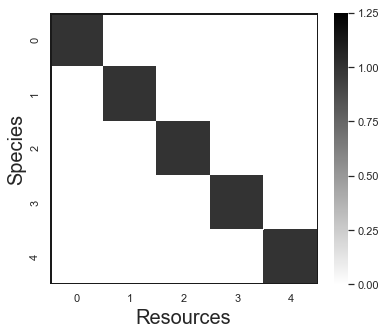

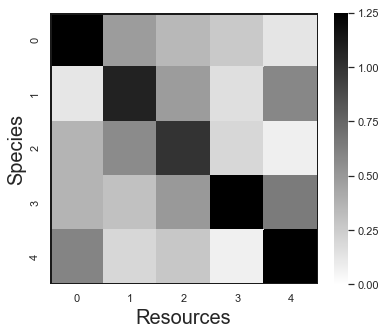

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
f, ax = plt.subplots()
c = np.eye(5)
ax = sns.heatmap(c,vmax=1.25, vmin=0, cmap='gray_r')
ax.set_xlabel('Resources',fontsize=20)
ax.set_ylabel('Species',fontsize=20)
ax.axhline(y=0, color='k',linewidth=3)
ax.axhline(y=5, color='k',linewidth=3)
ax.axvline(x=0, color='k',linewidth=3)
ax.axvline(x=5, color='k',linewidth=3)
fig_name='scheme_heatmap1'+'.pdf'
f.set_size_inches(6, 5)
f.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

f, ax = plt.subplots()
c = np.eye(5)+1.5/np.sqrt(5)*np.random.random((5, 5))

ax=sns.heatmap(c,vmax=1.25, vmin=0, cmap='gray_r')
ax.set_xlabel('Resources',fontsize=20)
ax.set_ylabel('Species',fontsize=20)
ax.axhline(y=0, color='k',linewidth=3)
ax.axhline(y=5, color='k',linewidth=3)
ax.axvline(x=0, color='k',linewidth=3)
ax.axvline(x=5, color='k',linewidth=3)
fig_name='scheme_heatmap2'+'.pdf'
f.set_size_inches(6, 5)
f.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

### Regime A, B and C

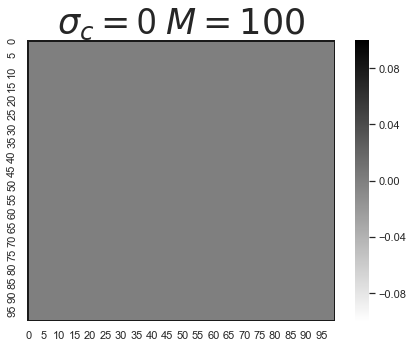

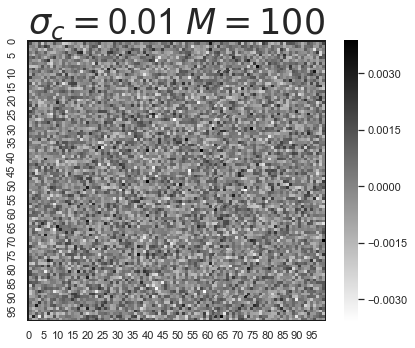

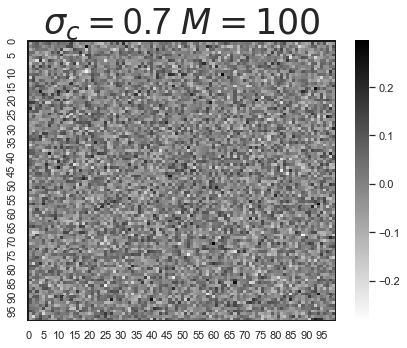

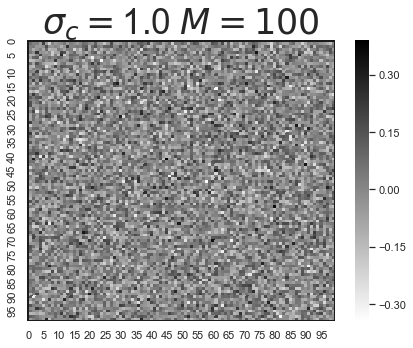

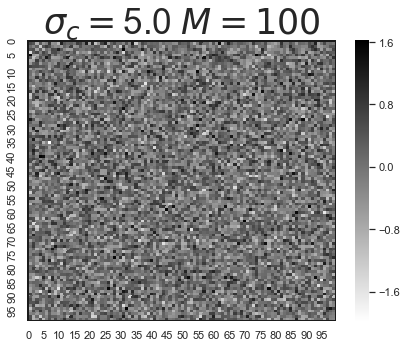

In [5]:
Sig=[0, 0.01, 0.7, 1., 5.]
Size=[100]
name_list=['A','B','C' ]
type_list=['Identity','Circulant','Block' ]
h=0;
for i in range(1):
    for j in range(5):
        i=3
        sigc=Sig[j];
        M=Size[0]
        if i==0:
            C=np.eye(M)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==1:
            C=circ(M, 7)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==2:
            C=block(10, 10)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==3:
            C=sigc/np.sqrt(M)*np.random.randn(M,M)
        fig, ax = plt.subplots()
        fig.set_size_inches(6, 5)
        ax=sns.heatmap(C, cbar=True, cmap='gray_r')
        ax.axhline(y=0, color='k',linewidth=3)
        ax.axhline(y=100, color='k',linewidth=3)
        ax.axvline(x=0, color='k',linewidth=3)
        ax.axvline(x=100, color='k',linewidth=3)
        ax.set_title('$\sigma_c=$'+str(sigc)+' $M=100$',fontsize=35)
        type_list
        fig.tight_layout()
        fig_name='Fig3_heatmap'+str(i)+str(j)+'.pdf'
        fig.savefig(fig_name, dpi=300, transparent=True)
        plt.show()

### size 100 and size 1000

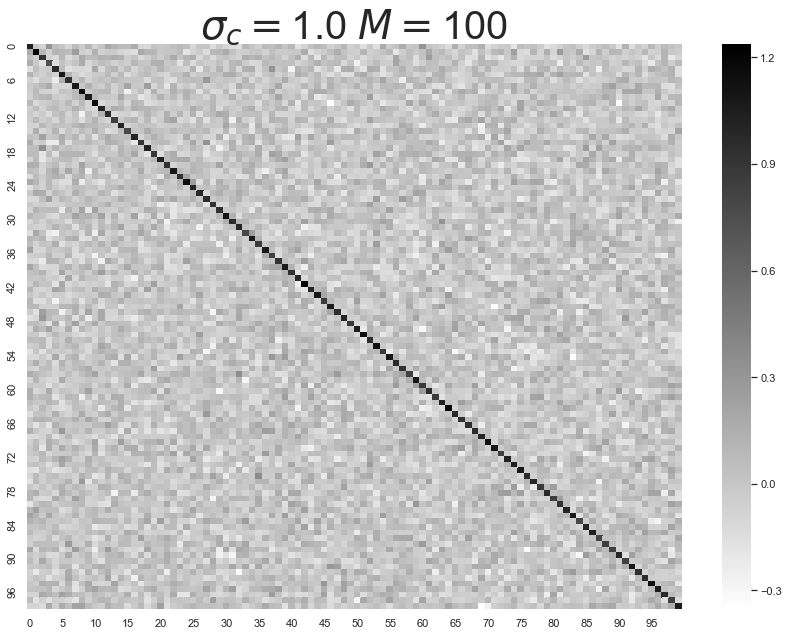

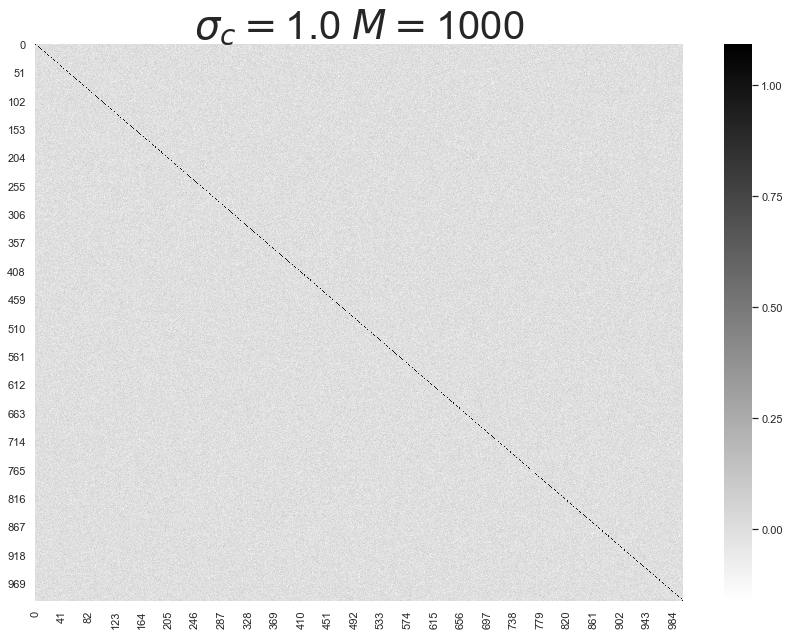

In [6]:
Sig=[1.]
Size=[100, 1000]
name_list=['Identity','Circulant','Block']
h=0
for j in range(2):
    for i in range(1):
        sigc=Sig[0];
        M=Size[j]
        fig,ax = plt.subplots()
        if i==0:
            C=np.eye(M)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==1:
            C=circ(M, 7)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==2:
            C=block(int(M/10), 10)+sigc/np.sqrt(M)*np.random.randn(M,M)
        ax=sns.heatmap(C, cbar=True, cmap='gray_r')
        ax.set_title('$\sigma_c=$'+str(sigc)+' $M=$'+str(M),fontsize=40) 
        fig.set_size_inches(12, 9)
        fig.tight_layout()
        fig_name='heatmap_M'+str(M)+'.tiff'
        fig.savefig(fig_name, dpi=500, transparent=True)
        plt.show()

## Community Properties

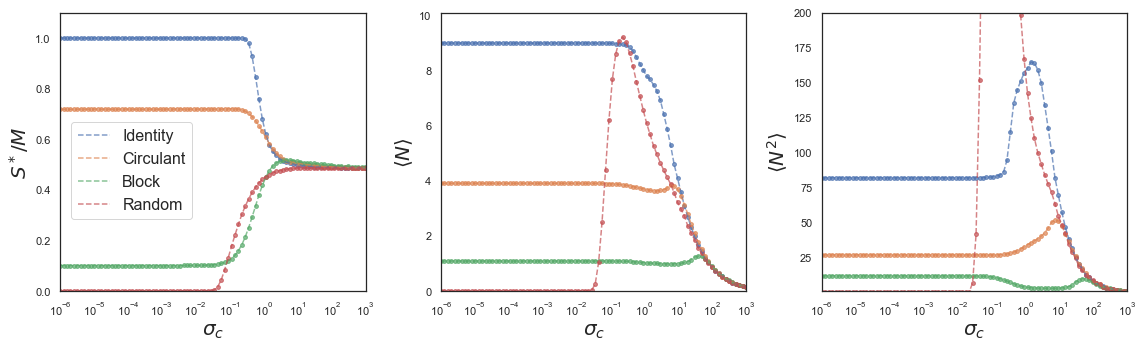

In [7]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_log_v2.csv')
Block = pd.read_csv('Data/Community_gaussian_block_quadratic_log_v2.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_quadratic_log_v2.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    for j in range(4):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['phi_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.23, 0.6, 0.6),prop={'size':16})
        if i==1:
            ax.plot(data['epsilon'],data['mean_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['mean_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 10.1])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([1,200.1])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_quadratic.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

## Linear Response Functions

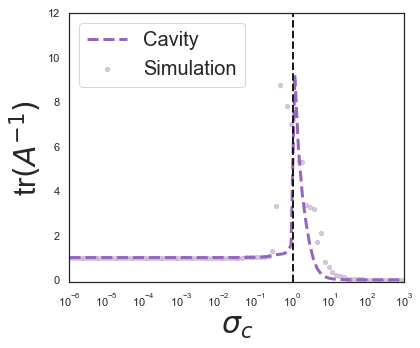

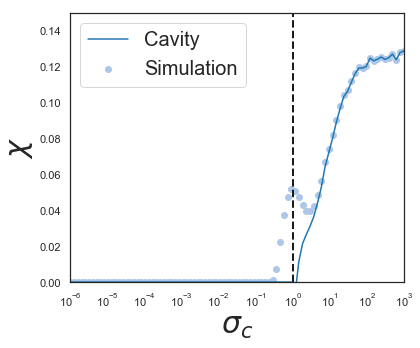

In [8]:
Diag=pd.read_csv('Data/Community_gaussian_identity_quadratic_log_v2.csv')
Data=Diag[Diag['mu']==0]
i=0;
T=np.asarray(Data['epsilon'])
phi_N=np.asarray(Data['phi_N'])
phi_R=np.asarray(Data['phi_R'])
Chi=np.zeros(len(T))
Nu=np.zeros(len(T))
i=0
for t in T:
    if t>1:
        Chi[i]=(phi_R[i]-1/t**2)*(1-phi_N[i]/phi_R[i])
        Nu[i]=-phi_N[i]/(phi_R[i]-phi_N[i])/t**2
    else:
        Nu[i]=phi_N[i]/(phi_N[i]*t**2-1)
    i=i+1
    
i=1
fig, ax = plt.subplots(1,1,figsize=(6,5))
c=8
#-------------------------------------------------------------
# plot nu, the response function for growth rate perturbations
#-------------------------------------------------------------
ax.plot(T, -Nu,color=tableau20[c],label='Cavity', linewidth=3,linestyle='dashed')
ax.scatter(Data['epsilon'], -Data['nu_threshold'],s=18,color=tableau20[c+1],alpha=0.7,label='Simulation')
ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
ax.set_xscale('log')
ax.set_ylim([-0.1,12])
ax.set_xlim([10**(-6), 10**(3)])
ax.set_xlabel(r'$\sigma_c$',fontsize=30)
ax.set_ylabel(r'tr$({A}^{-1})$',fontsize=30)
ax.legend(loc='upper left',fontsize=20)
fig.tight_layout()
fig_name='linear_response1.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)
#-------------------------------------------------------------
# plot chi, the response function for environemnt supplies perturbations
#-------------------------------------------------------------
fig, ax = plt.subplots(1,1,figsize=(6,5))
c=0;
ax.plot(T, Chi,color=tableau20[c],label='Cavity')
ax.scatter(Data['epsilon'], Data['chi'],color=tableau20[c+1],label='Simulation')
ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
ax.set_ylabel(r'$\chi$',fontsize=30)
ax.set_xscale('log')
ax.set_xlim([10**(-6), 10**(3)])
ax.set_ylim([0,0.15])
ax.set_xlabel(r'$\sigma_c$',fontsize=30)
ax.legend(loc='upper left',fontsize=20)
fig_name='linear_response2.pdf'
fig.tight_layout()
fig.savefig(fig_name, dpi=300, transparent=True)

## Other dynamics
### Linear-resource dynamics

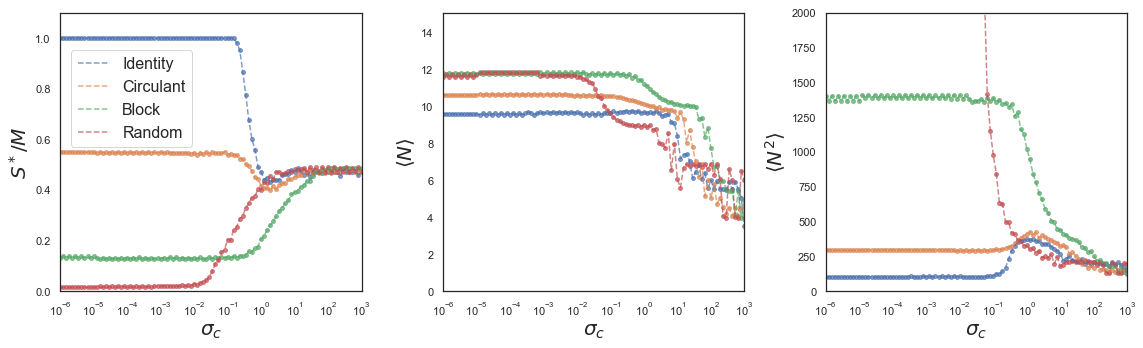

In [9]:
Identity = pd.read_csv('Data/Community_diag_linear_log_v1.csv')
Null = pd.read_csv('Data/Community_null_linear_log_v1.csv')
Block = pd.read_csv('Data/Community_block_linear_log_v1.csv')
Circulant = pd.read_csv('Data/Community_circulant_linear_log_v1.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    for j in range(4):
        data=Data[j]
        data =data[data['mu'] == 0.6] 
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['phi_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.49, 0.6, 0.6),prop={'size':16})
        if i==1:
            ax.plot(data['epsilon'],data['mean_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['mean_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 15.1])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([1,2000.1])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_linear.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

### Crossfeeding

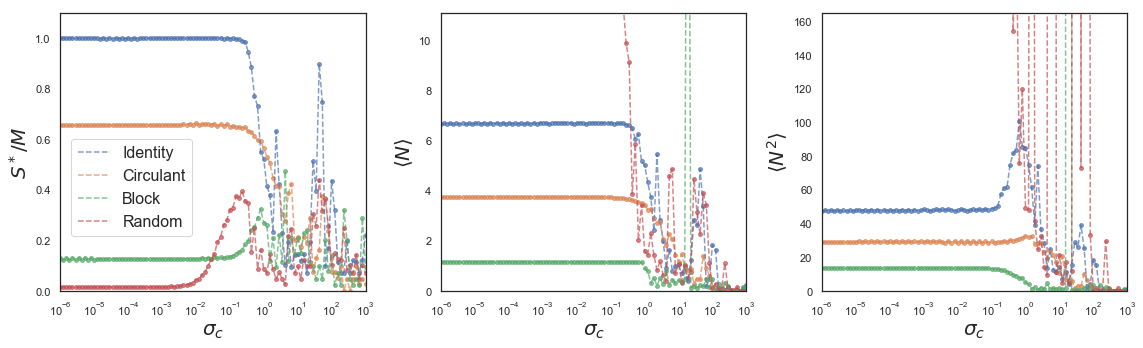

In [10]:
Identity = pd.read_csv('Data/Community_crossfeedingdiag_quadratic_log.csv')
Null = pd.read_csv('Data/Community_crossfeedingnull_quadratic_log.csv')
Block = pd.read_csv('Data/Community_crossfeedingblock_quadratic_log.csv')
Circulant = pd.read_csv('Data/Community_crossfeedingcirculant_quadratic_log.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    for j in range(4):
        data=Data[j]
        data =data[data['mu'] == 0.6] 
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['phi_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6),prop={'size':16})
        if i==1:
            ax.plot(data['epsilon'],data['mean_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['mean_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 11.1])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 165.1])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_crossfeeding.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

## Positive Consumption Rate

### Nonzero $\mu$

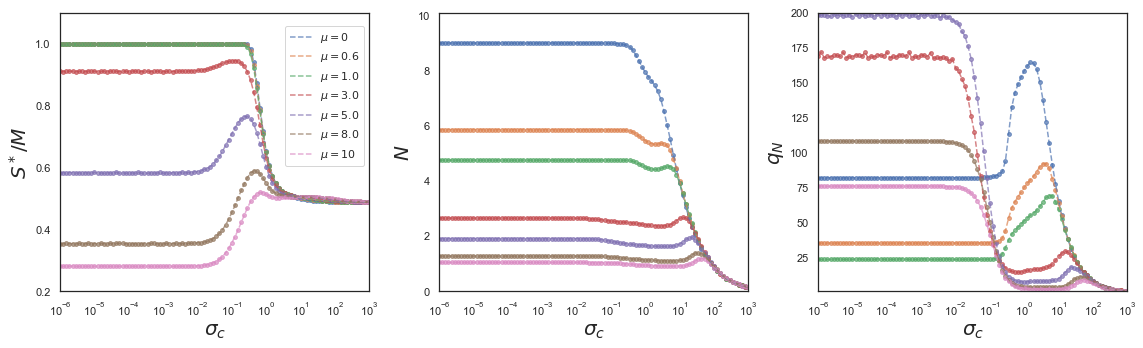

In [11]:
Identity = pd.read_csv('Data/Community_mu_diag_quadratic_log.csv')
Data=Identity
Mu=list(set(Identity.mu))
Legend = ["$\mu=0$", "$\mu=0.6$", "$\mu=1.0$", "$\mu=3.0$", "$\mu=5.0$", "$\mu=8.0$", "$\mu=10$"]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    for j in range(7):
        data =Data[Data['mu'] == Mu[j]] 
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['phi_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0.2, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.71, 0.43, 0.6, 0.6))
        if i==1:
            ax.plot(data['epsilon'],data['mean_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['mean_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 10.1])
            ax.set_ylabel(r'$N$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([1, 200.1])
            ax.set_ylabel(r'$q_N$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_mu.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

### Uniform Sampling

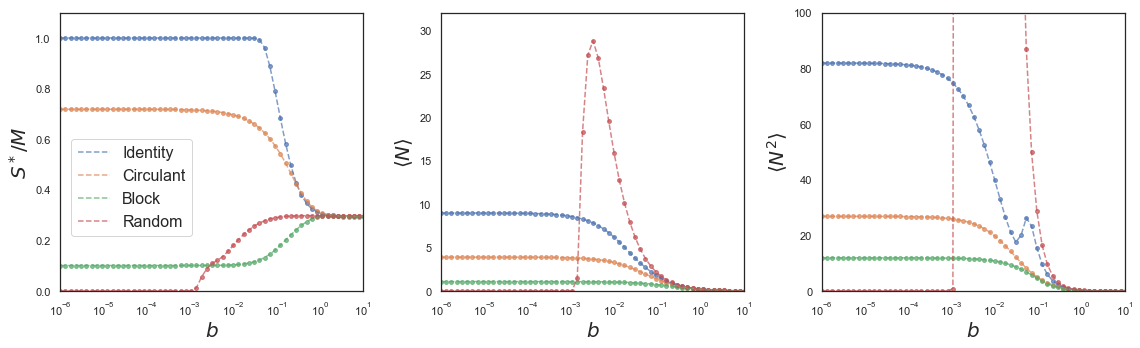

In [12]:
Identity = pd.read_csv('Data/Community_uniform_identity_quadratic_log_v2.csv')
Null = pd.read_csv('Data/Community_uniform_null_quadratic_log_v2.csv')
Block = pd.read_csv('Data/Community_uniform_block_quadratic_log_v2.csv')
Circulant = pd.read_csv('Data/Community_uniform_circulant_quadratic_log_v2.csv')
Legend = ["Identity", "Circulant", "Block", "Random"]
Data=[Identity, Circulant, Block, Null]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**1])
    ax.set_xlabel(r'$b$',fontsize=20)
    ax.set_xscale('log')
    for j in range(4):
        data =Data[j]
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['Survive']/100, alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0.0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6),prop={'size':16})
        if i==1:
            ax.plot(data['epsilon'],data['mean_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['mean_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 32.1])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 100.1])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_uniform.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

### Binary Sampling

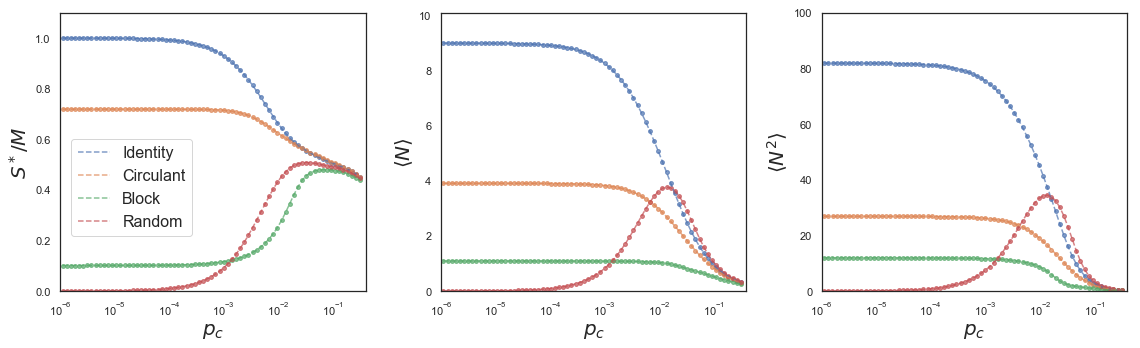

In [13]:
Identity = pd.read_csv('Data/Community_binomial_identity_quadratic_log_v2.csv')
Null = pd.read_csv('Data/Community_binomial_null_quadratic_log_v2.csv')
Block = pd.read_csv('Data/Community_binomial_block_quadratic_log_v2.csv')
Circulant = pd.read_csv('Data/Community_binomial_circulant_quadratic_log_v2.csv')
Legend = ["Identity", "Circulant", "Block", "Random"]
Data=[Identity, Circulant, Block, Null]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 0.4])
    ax.set_xlabel(r'$p_c$',fontsize=20)
    ax.set_xscale('log')
    for j in range(4):
        data =Data[j]
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['Survive']/100, alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0.0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6),prop={'size':16})
        if i==1:
            ax.plot(data['epsilon'],data['mean_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['mean_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 10.1])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 100.1])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_binary.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

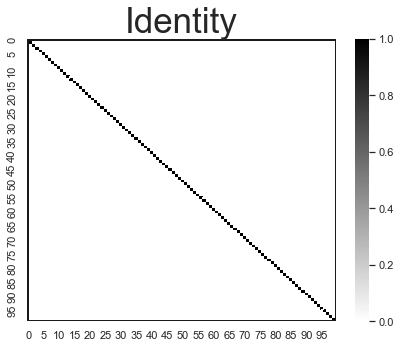

NameError: name 'circ' is not defined

In [14]:
Sig=[0, 0.01, 0.7, 1., 5.]
Size=[100]
name_list=['A','B','C' ]
type_list=['Identity','Circulant','Block' ]
h=0;
for i in range(3):
    for j in range(1):
        j=0
        sigc=Sig[j];
        M=Size[0]
        if i==0:
            C=np.eye(M)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==1:
            C=circ(M, 7)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==2:
            C=block(10, 10)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==3:
            C=sigc/np.sqrt(M)*np.random.randn(M,M)
        #fig, (cax, ax) = plt.subplots(nrows=2, figsize=(6,6),  gridspec_kw={"height_ratios":[0.05, 1]})
        fig, ax = plt.subplots()
        fig.set_size_inches(6, 5)
        ax=sns.heatmap(C, cmap='gray_r')
        ax.axhline(y=0, color='k',linewidth=3)
        ax.axhline(y=100, color='k',linewidth=3)
        ax.axvline(x=0, color='k',linewidth=3)
        ax.axvline(x=100, color='k',linewidth=3)
        #fig.colorbar(ax.get_children()[0], cax=cax, orientation="horizontal")
        #ax.set_title('$\sigma_c=$'+str(sigc)+' $M=100$',fontsize=35)
        ax.set_title(type_list[i],fontsize=35)
        type_list
        fig.tight_layout()
        fig_name='Fig3_heatmap'+str(i)+str(j)+'.pdf'
        fig.savefig(fig_name, dpi=300, transparent=True)
        plt.show()

## Minium eigenvalue

### Gaussian

In [ ]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_log_v2.csv')
Block = pd.read_csv('Data//Community_gaussian_block_quadratic_log_v2.csv')
Circulant = pd.read_csv('Data//Community_gaussian_circulant_quadratic_log_v2.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
Legend2 = ["Simulations", "Circulant", "Block", "Random"]
for i in range(1):
    data=Data[i]
    data =data[data['mu'] == 0.0] 
    fig, ax = plt.subplots()
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.set_ylim([0.002, 10000.1])
    ax.set_yscale('log')
    ax.set_ylabel(r'$\lambda_{min}$',fontsize=20)
    if i==0:
        ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
    if i==0:
        ax.scatter([0.1,0.2,0.3,0.4,0.5,0.6,0.7], [0.91, 0.82,0.7, 0.55, 0.4, 0.21,0.06 ], alpha=0.7, label='Stieltjes transform method', s=15,c='r')
    ax.scatter(data['epsilon'], data['lam_min'], alpha=0.7, label='Simulation', s=15,c=tableau20[2*i])
    ax.plot(data['epsilon'],data['epsilon']**2*(1-np.sqrt(data['phi_N']/data['phi_R']))**2,linestyle='dashed', alpha=0.9,linewidth=3, label='Marchenko–Pastur Law',c=tableau20[2*i])
    ax.legend(loc='lower left',bbox_to_anchor=(0.00, 0.59, 0.6, 0.6),prop={'size':13})
    fig.set_size_inches(6, 5)
    fig.tight_layout()
    fig_name='lam_min_gaussian_'+Legend[i]+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)